In [47]:
import pandas as pd

In [48]:
data=pd.read_csv("salary_data.csv")

In [49]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
data.shape

(30, 2)

In [51]:
y=data["Salary"]
x=data["YearsExperience"]

In [52]:
type(x)

pandas.core.series.Series

In [53]:
X=x.values.reshape(30,1)#<---converting to numpy array

In [54]:
type(X)

numpy.ndarray

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model=LinearRegression() #algorithm/model/estimator

In [57]:
model.fit(X,y)   #<--training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
model.predict([[6.9]])  #<--predictions

array([90996.94021671])

In [59]:
model.coef_ #<--value of a in y=ax

array([9449.96232146])

In [60]:
model.intercept_  #<-- value of b in equation y=ax+b

25792.20019866871

In [61]:
# the values of a and b are calculated by hit and trail method.

In [62]:
#1.1*9449.96232146  != actual values as of dataset

In [63]:
# the above is due to variable b (intercept) in equation y=ax+b
#intercept is the value of y at x=0.

In [64]:
# y=ax+b
# y=1.1*9449.96232146 + 25792.20019866871

In [65]:
1.1*9449.96232146 + 25792.20019866871   #almost equal to actual value

36187.158752274714

# save the model

In [66]:
from sklearn.externals import joblib

In [67]:
joblib.dump(model,"salary_model.pk1")  #python app

['salary_model.pk1']

## visualisation

In [68]:
import matplotlib.pyplot as plt

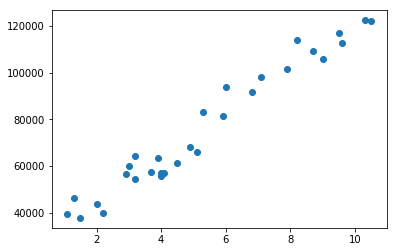

In [69]:
plt.scatter(X,y)

In [70]:
data.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

# error or loss functions

In [71]:
from sklearn import metrics

In [72]:
metrics.mean_absolute_error(X,y) # MAE

75997.68666666668

In [73]:
# if above values goes to close to zero it is best model:ideal case


In [74]:
metrics.mean_squared_error(X,y)   # MSE

6502000509.35

#  working on training and testing set

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
#train_test_split(X,y,30)   #spliting data
# here 30 means keep 30% of data for testing

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [78]:
#above we splitted data in 4 parts, 2 for training and 2 for testing
# test_size=0.30 means we have total elements 30
# random_state means we are picking random data

In [79]:
model.fit(X_train,y_train)  #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
model.predict(X_test)   #testing on our test data

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [81]:
y_test  #<-- this was the actual answers of testing set

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
Name: Salary, dtype: float64

In [82]:
y_pred=model.predict(X_test)   #testing on our test data

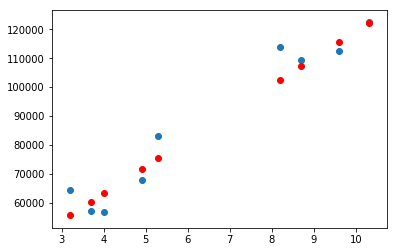

In [83]:
plt.scatter(X_test,y_test)    #actual
plt.scatter(X_test,y_pred,color="red")    #predicted
#comparing prediction and actual values

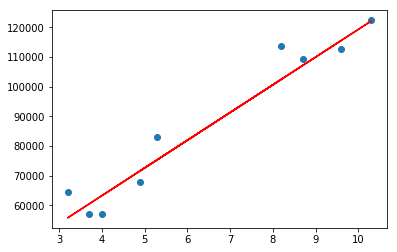

In [84]:
plt.scatter(X_test,y_test)    #actual
plt.plot(X_test,y_pred,color="red")    #predicted
#comparing prediction and actual values

In [85]:
#the above line is the best fit line for this data